# 1과목

## Numpy Library 활용 (병합)

In [5]:
import numpy as np
a = np.array([1,2,3,4])
b = np.array([[5,6,7],[8,9,10]])
c = np.array([[11,12,13],[14,15,16]])

print("---concatenate---") # => 결과 2차원
con2 = np.concatenate((b,c)); print(con2,"\n")
con4 = np.concatenate((b,c), axis=1); print(con4,"\n")

print("---stack---") # => 결과 3차원
stack1 = np.stack((b,c)); print(stack1,"\n")
stack2 = np.stack((b,c), axis=1); print(stack2,"\n")

print("---append---") # => 결과 1 or 2차원
appd1 = np.append(b,c); print(appd1,"\n")
appd3 = np.append(b,c, axis=1); print(appd3,"\n")

print("---split---")
spt1 = np.split(appd3, 2); print(spt1,"\n") # 2구간으로 나눔.
spt2 = np.split(appd3, 2, axis=1); print(spt2,"\n")


---concatenate---
[[ 5  6  7]
 [ 8  9 10]
 [11 12 13]
 [14 15 16]] 

[[ 5  6  7 11 12 13]
 [ 8  9 10 14 15 16]] 

---stack---
[[[ 5  6  7]
  [ 8  9 10]]

 [[11 12 13]
  [14 15 16]]] 

[[[ 5  6  7]
  [11 12 13]]

 [[ 8  9 10]
  [14 15 16]]] 

---append---
[ 5  6  7  8  9 10 11 12 13 14 15 16] 

[[ 5  6  7 11 12 13]
 [ 8  9 10 14 15 16]] 

---split---
[array([[ 5,  6,  7, 11, 12, 13]]), array([[ 8,  9, 10, 14, 15, 16]])] 

[array([[ 5,  6,  7],
       [ 8,  9, 10]]), array([[11, 12, 13],
       [14, 15, 16]])] 



## 구조적 프로그래밍

In [6]:
# 보통 함수
def getArea(a,b):
	area = a*b/2
	return area
print(getArea(5,10))

# lambda 사용
lam = lambda a,b : a*b/2
print(lam(5,10))

# lambda 사용 (값 지정)
lam1 = (lambda a,b : a*b/2)(5,10)
print(lam1)

25.0
25.0
25.0


### lambda (map, filter)

In [7]:
print(list(map(lambda a,b : a*b/2, [5,6,7],[10,11,12])))

x = [1,2,3,4,5,6,7,8,9,10]
y = list(filter(lambda t : t>5 and t<10, x))
# y2 = list(filter(lambda t : t>5 and t<10)) #안됨. ,x 있어야함.
print(y,"\n")

z1 = lambda t : t*2 if t>6 else 10*t
print(list(map(z1,x)),"\n")

z2 = lambda t : t*2 if t>9 else t*4 if t<6 else 100*t # 앞 if-else가 먼저. else일때 다음 if문 봄.
print(list(map(z2,x)))

[25.0, 33.0, 42.0]
[6, 7, 8, 9] 

[10, 20, 30, 40, 50, 60, 14, 16, 18, 20] 

[4, 8, 12, 16, 20, 600, 700, 800, 900, 20]


### pipe 함수 : 함수 내에 함수를 연속적으로 적용.

In [9]:
import pandas as pd
d = list(range(1,11,1)); print(d)
x = pd.DataFrame(d, columns=['number'])

lam1 = lambda t : t**2
y = x.pipe(lam1); print(y)

lam2 = lambda t : np.sqrt(t)
z = x.pipe(lam1).pipe(lam2)
print(z)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
   number
0       1
1       4
2       9
3      16
4      25
5      36
6      49
7      64
8      81
9     100
   number
0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0


# 2과목

## 1. 데이터 수집과 전처리

### 방향 순회 (행, 행_tuple)

In [23]:
data = pd.DataFrame({'학번':['1','2','3'],
                     '성명':['김민지','민지','감자'],
                     '나이':[20,21,22]})

df = data.set_index('학번')

# 행 방향 순회 : iterrows()
for idx, row in df.iterrows():
    print(idx, row,end=' ')
    print(row['성명'])

1 성명    김민지
나이     20
Name: 1, dtype: object 김민지
2 성명    민지
나이    21
Name: 2, dtype: object 민지
3 성명    감자
나이    22
Name: 3, dtype: object 감자


In [24]:
# 행(tuple)별 순회 : itertuples()
for item in df.itertuples():
    print(item)
    for i in range(len(item)):
        print(item[i])
    print()

Pandas(Index='1', 성명='김민지', 나이=20)
1
김민지
20

Pandas(Index='2', 성명='민지', 나이=21)
2
민지
21

Pandas(Index='3', 성명='감자', 나이=22)
3
감자
22



## 2. 기술통계 분석

### 빈도분석 (Crosstab)

In [26]:
import pandas as pd

data = {'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male'],
        'Preference': ['A', 'A', 'B', 'B', 'A', 'B']}
df = pd.DataFrame(data)

# Gender와 Preference의 교차표 생성
crosstab = pd.crosstab(df['Gender'], df['Preference'])

print(crosstab)


Preference  A  B
Gender          
Female      2  1
Male        1  2


### 기술통계 분석 기법

#### 사분위수 (pandas, numpy, describe())


In [ ]:
# quantile() 함수 이용 : pandas
pd.price.quantile(0.25)

# percentile() 함수 이용 : numpy
np.percentile(df.price, 25)

# describe() method 이용
df.price.describe()['25%']

#### 최빈값 (Counter 사용)

In [ ]:
from collections import Counter

cnt = Counter(df.price)
cnt.most_common() #내림차순 정렬.
cnt.most_common(7) # 상위 7개 추출.

#### 왜도, 첨도

In [ ]:
from scipy.stats import skew, kurtosis

# scipy.stats 모듈 이용
skew(df.price)
kurtosis(df.price, fisher=True) # fisher=True: 기준(정규분포의 첨도=0)

# pandas 모듈 이용
df.price.skew() # 왜도
df.price.kurt() # 첨도

### EDA

#### stem()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df['1월']
y = df['2월']

plt.stem(x.index, x, use_line_collection=True) #줄기잎도표(인덱스, 1월, 수직)

plt.stem(y.index, y, orientation='horizontal', use_line_collection=True) #줄기잎도표 (인덱스, 2월, 수평)


#### Q-Q 도표

In [ ]:
import scipy.stats as stats

stats.probplot(x, dist=stats.norm, plot=plt)

#### 주요 확률분포 클래스, 메소드 및 인수 => 127p

Text(0, 0.5, 'f(x)')

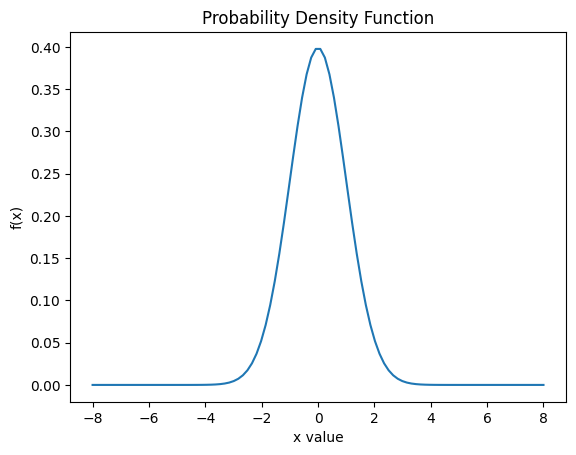

In [46]:
import matplotlib.pyplot as plt
# import scipy as sp
import scipy.stats as stats
import numpy as np

x = np.linspace(-8,8,100) # 표본값 생성
rv = stats.norm() # 정규분포
pdf = rv.pdf(x) # 확률밀도함수
plt.plot(x, pdf); plt.title('Probability Density Function'); plt.xlabel('x value'); plt.ylabel('f(x)')


# 3과목

## 1. 상관관계 분석

In [ ]:
from scipy import stats # 사이파이(가설 검정)
import statistics as st # 통계량 (공분산, 상관계수) 계산
from scipy.stats import wilcoxon # 윌콕슨 순위 검정 -> 비모수 통계분석

### 공분산 & 상관계수

In [ ]:
# 공분산 : 판다스 함수 이용
df.cov().iloc[0,1]

# 공분산 : statistics 모듈
st.covariance(df['height'], df['weight'])

# 공분산 : 넘파이 함수 이용
np.cov(df['height'], df['weight'], ddof=0) #ddof=0 : 공분산 계산시 모집단 샘플수(n)로 계산.

In [ ]:
# 키-몸무게 사이 상관계수 : 판다스 모듈
df.corr(method='pearson').iloc[0,1]
df.corr(method='kendall').iloc[0,1]
df.corr(method='spearman').iloc[0,1]

# 키-몸무게 사이 상관계수 : statistics 모듈
st.correlation(df['height'], df['weight'])

from scipy import stats
stats.pearsonr(df['height'], df['weight']) # 사이파이 모듈 이용 (상관계수, p-value)

### 가설 검정 (scipy 라이브러리 활용)

In [ ]:
from scipy import stats # 가설검정

test = stats.ttest_ind(df['height'], df['weight']) # T-검정(평균 차이 가설검정), 귀무가설 : 키와 몸무게의 평균은 차이가 없다.

test # T-검정 결과 (통계량, 유의확률(p-value))
test[0], test[1] # 통계량, p-value

### 비모수 통계 (윌콕슨 순위합 검정)

In [73]:
import pandas as pd
from scipy import stats
import statistics as st
from scipy.stats import wilcoxon
import warnings; warnings.filterwarnings('ignore')

data = pd.DataFrame({'ID':['1','2','3'],
                    #  '성별':['여성','남성','남성'], # string 오류 뜸.
                    #  '학년':['1','2','3'],
                     '국어':[2,6,4],
                     '수학':[2,3,6],
                     '영어':[3,4,5]},
                    columns = ['ID','국어','수학','영어'])
df = data.set_index('ID')

print("=== 공분산, 상관계수 (판다스 모듈 이용)===")
print(df.cov())
print(df.corr())
print('--------------------------------------------------------------')
print("=== 수학-영어 공분산, 상관계수 (statistics 모듈 이용)===")
print(st.covariance(df['수학'], df['영어']))
print(st.correlation(df['수학'], df['영어']))
print('--------------------------------------------------------------')
print("=== 상관계수, p-value (Scipy 모듈 이용)===")
print(stats.pearsonr(df['수학'], df['영어']))
print(stats.pearsonr(df['수학'], df['영어'])[0])
print(stats.pearsonr(df['수학'], df['영어'])[1])
print('--------------------------------------------------------------')
print("=== Wilcoxon 검정 결과 (통계량, 유의확률_p-value)===")
test = wilcoxon(df['수학'], df['영어'])
print(test)
print(test[0])
print(test[1])


=== 공분산, 상관계수 (판다스 모듈 이용)===
     국어        수학   영어
국어  4.0  1.000000  1.0
수학  1.0  4.333333  2.0
영어  1.0  2.000000  1.0
          국어        수학        영어
국어  1.000000  0.240192  0.500000
수학  0.240192  1.000000  0.960769
영어  0.500000  0.960769  1.000000
--------------------------------------------------------------
=== 수학-영어 공분산, 상관계수 (statistics 모듈 이용)===
2.0
0.9607689228305226
--------------------------------------------------------------
=== 상관계수, p-value (Scipy 모듈 이용)===
PearsonRResult(statistic=0.9607689228305225, pvalue=0.1789123750220675)
0.9607689228305225
0.1789123750220675
--------------------------------------------------------------
=== Wilcoxon 검정 결과 (통계량, 유의확률_p-value)===
WilcoxonResult(statistic=2.0, pvalue=0.75)
2.0
0.75


## 2. 회귀분석

In [ ]:
from statsmodels.formula.api import ols # 선형회귀분석 (Ordinary Least Squares)
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn import metrics # 정확도 평가 (MSE, MAE, R^2)
import statsmodels.api as sm # 선형회귀분석 및 통계분석

### 단순 회귀분석

#### OLS

In [145]:
import pandas as pd
from statsmodels.formula.api import ols

df = pd.read_csv("data/women.csv",header=0, index_col=0) # header=0:컬럼명이 첫 번째 행에 위치. index_col=0 : 첫 컬럼을 인덱스 열로 사용.
x,y = df['height'], df['weight']
model = ols('y ~ x', data=df).fit() # 선형회귀분석 모형 구축

model.summary() # 모형 적합 결과 요약

# 기울기, y절편 추정값
print(f'y = {model.params.x} x + {model.params.Intercept}\n') 

# 독립변수 추정값 (키에 따른 종속변수(몸무게))
model.fittedvalues

# 잔차값, Residuals
model.resid

# 잔차값의 평균
model.resid.mean()

# 키(67 inches)에 대한 몸무게(pounds) 예측값
print("키=67일 때 몸무게 실제값 : ",data.iloc[9,1])
print("키=67일 때 몸무게 예측값 : ",model.predict(exog=dict(x=67)).values)
print("키=67일 때 몸무게 예측값(기울기, y절편이용) : ",model.params.Intercept+67*model.params.x)


y = 3.450000000000011 x + -87.51666666666733

키=67일 때 몸무게 실제값 :  142
키=67일 때 몸무게 예측값 :  [143.63333333]
키=67일 때 몸무게 예측값(기울기, y절편이용) :  143.63333333333338


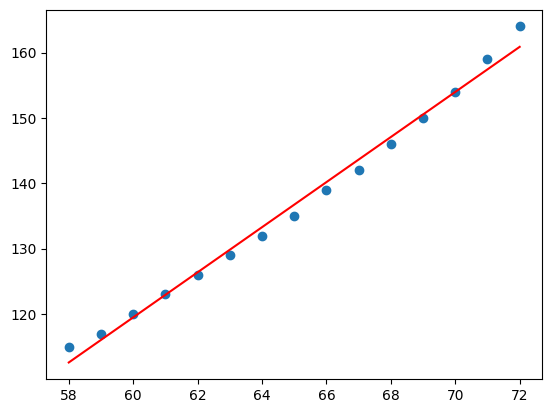

In [147]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, model.fittedvalues, color="red")

In [148]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1433.
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.09e-14
Time:                        19:15:06   Log-Likelihood:                -26.541
No. Observations:                  15   AIC:                             57.08
Df Residuals:                      13   BIC:                             58.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -87.5167      5.937    -14.741      0.000    -100.343     -74.691
x              3.4500      0.091     37.855      0.000       3.253       3.647
==============================================================================
Omnibus:                        2.396   Durbin-Watson:                   0.315
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.660
Skew:                           0.789   Prob(JB):                        0.436
Kurtosis:                       2.596   Cond. No.                         982.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### LinearRegression()

In [158]:
from sklearn.linear_model import LinearRegression

data = pd.read_csv("data/women.csv",header=0, index_col=0)

x = data['height'].values.reshape(-1,1) # 2차원 배열로 변경.
y = data['weight']
model = LinearRegression().fit(x,y)

print('y절편 : ', model.intercept_)
print('기울기 : ', model.coef_)

residual = y - model.predict(x) # 잔차
residual.mean() # 잔차값의 평균

w67 = data.loc[data['height']==67, 'weight'].values[0]
print("키=67일 때 몸무게 실제값 : ",w67)
print("키=67일 때 몸무게 예측값 : ",model.predict([[67]]))

# 실제값과 예측값 사이의 상대오차 (%)
print('실제값<->예측값의 상대오차 => ', abs(w67 - model.predict([[67]]))/w67*100)

y절편 :  -87.51666666666657
기울기 :  [3.45]
키=67일 때 몸무게 실제값 :  142
키=67일 때 몸무게 예측값 :  [143.63333333]
실제값<->예측값의 상대오차 =>  [1.15023474]


### 다중 회귀분석

In [ ]:
import seaborn as sns

data = pd.read_csv("data/seatbelts.csv", header=0, index_col=0)
data.head(2)
# DriversKilled	=> y (종속변수)

,DriversKilled,drivers,front,rear,kms,PetrolPrice,VanKilled,law
1,107,1687,867,269,9059,0.102972,12,0
2,97,1508,825,265,7685,0.102363,6,0


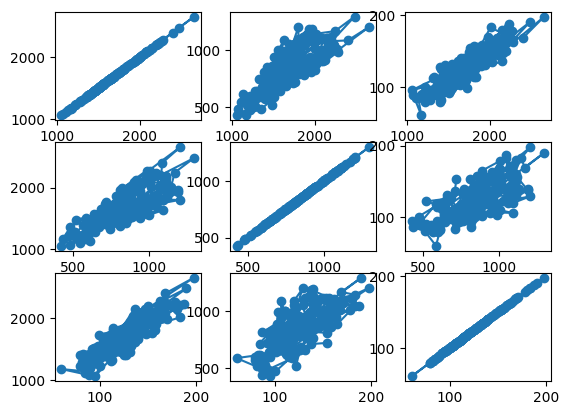

In [ ]:
cols = ['drivers','front','DriversKilled'] # 사고발생건수, 앞좌석 승객수, 사망자수

for i, col in enumerate(cols):
    for i2, col2 in enumerate(cols):
        plt.subplot2grid((3,3), (i,i2))
        plt.plot(data[col], data[col2], marker='o')


해석 : (front에 비해) drivers 요인이 DriversKilled에 다소 많은 영향을 미침.

즉, 사고 많이 발생 => 사망자수 증가.

#### OLS

In [ ]:
cols = data.columns

x = data[cols[1:6]]
y = data['DriversKilled']

model = ols('y ~ x', data=data).fit() # 다중 선형회귀분석 모형 구축
model.summary() # 다중 선형회귀분석 모형 적합 결과 요약

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.10e-62
Time:                        19:42:17   Log-Likelihood:                -739.19
No. Observations:                 192   AIC:                             1490.
Df Residuals:                     186   BIC:                             1510.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.5229     14.016     -1.393      0.165     -47.174       8.128
x[0]           0.0850      0.005     16.239      0.000       0.075       0.095
x[1]          -0.0147      0.013     -1.104      0.271      -0.041       0.012
x[2]           0.0190      0.020      0.928      0.355      -0.021       0.059
x[3]           0.0005      0.000      1.067      0.287      -0.000       0.001
x[4]         -23.4613     85.830     -0.273      0.785    -192.787     145.865
==============================================================================
Omnibus:                        2.639   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.589
Skew:                           0.282   Prob(JB):                        0.274
Kurtosis:                       2.926   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
# 종속변수 값에 따른 실제값/사망자수 = 119명
print(data.iloc[4],'\n')

# 종속변수에 대한 예측값
pred = model.predict(exog = dict(x=[[1632,991,454,11823,0.10102]]))
print(pred,'\n')

# 실제값과 예측값 사이의 상대오차_절대값(%)
relative_error =( data.iloc[4,0] - pred.values )/data.iloc[4,0]*100 
print(abs(relative_error))

DriversKilled      119.00000
drivers           1632.00000
front              991.00000
rear               454.00000
kms              11823.00000
PetrolPrice          0.10102
VanKilled           10.00000
law                  0.00000
Name: 5, dtype: float64 

0    116.772685
dtype: float64 

[1.87169364]


#### 성능평가 지표 (ols로 구축된 회귀 모형식), R-squared

In [188]:
import numpy as np
from sklearn import metrics

df = data.copy() # 새로운 열 추가 사용.

df['pred'] = model.fittedvalues
print(df.head(),'\n')

# print("ME : ", (df['DriversKilled']-df['pred']).mean())
print("MSE : ", metrics.mean_squared_error(y, df['pred']))
print("RMSE : ", metrics.root_mean_squared_error(y, df['pred'])) # sqrt(MSE)
print("MAE : ", metrics.mean_absolute_error(y, df['pred']))
# print("MPE : ", ((y-df['pred'])/y).mean())
print("MAPE : ", metrics.mean_absolute_percentage_error(y, df['pred']))

rsquared = metrics.r2_score(y, df['pred'])
print('R Squared(R^2) : ', rsquared)

   DriversKilled  drivers  front  rear    kms  PetrolPrice  VanKilled  law  \
1            107     1687    867   269   9059     0.102972         12    0   
2             97     1508    825   265   7685     0.102363          6    0   
3            102     1507    806   319   9963     0.102062         12    0   
4             87     1385    814   407  10955     0.100873          8    0   
5            119     1632    991   454  11823     0.101020         10    0   

         pred  
1  118.332108  
2  102.989283  
3  105.350498  
4   97.057301  
5  116.772692   

MSE :  129.28743225237358
RMSE :  11.370463150301907
MAE :  9.007509477926398
MAPE :  0.0765115725606875
R Squared(R^2) :  0.7982354684742119


### 변수 선택 방법 _ 전진선택법

In [ ]:
import statsmodels.api as sm

def forward_selection(X, y, alpha=0.05):
    selected_features = []
    remaining_features = set(X.columns)
    while remaining_features:
        best_pvalue = float('inf') # 초기값 : 양의 무한대
        best_feature = None        # 초기값 : None(공집합)
        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            X_subset = X[candidate_features]
            X_subset = sm.add_constant(X_subset)    # 상수항 결합
            model = sm.OLS(y, X_subset).fit()       # 선형회귀모형 적합
            pvalues = model.pvalues                 # 적합 모형의 p-values(유의확률)
            max_pvalue = pvalues.iloc[1:].max()     # p-values의 최대값
            if max_pvalue < best_pvalue:            # (유의확률 최대값, 유의변수) 수정
                best_pvalue = max_pvalue
                best_feature = feature
        if best_pvalue < alpha:                     # 유의수준과 비교 (유의확률 < 유의수준인 경우 종료)
            selected_features.append(best_feature)  # 유의변수 추출
            remaining_features.remove(best_feature)
        else: break
    return selected_features

X = data[['drivers','front','rear','kms','PetrolPrice']]
y = data[['DriversKilled']]
selected_features = forward_selection(X,y)
selected_features 
        

['drivers', 'kms']

## 3. 로지스틱 회귀분석

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #표준화
from sklearn.preprocessing import label_binarize #레이블 이진화(다중 클래스)
from sklearn.metrics import confusion_matrix #혼동행렬
from sklearn.metrics import log_loss #성능분석 지표
from sklearn.metrics import classification_report #분류 분석 성능평가 지표
from sklearn.metrics import roc_curve #ROC 그래프
from sklearn.metrics import auc #AUC 계산
from sklearn.metrics import f1_score #F1-score 계산
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import precision_score #정밀도 계산
from sklearn.metrics import recall_score #재현율(민감도) 계산
from sklearn.model_selection import train_test_split #(학습, 검증) 데이터 랜덤 추출

import matplotlib.pyplot as plt

### (이후 코드 보기) 학습, 예측 

In [37]:
# from sklearn.datasets import load_iris
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import numpy as np

# iris = load_iris()
# irisdata = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
#                         columns = iris['feature_names']+['target'])
# irisdata['target'] = irisdata['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
# print(irisdata.columns[:-1])
# features = irisdata[irisdata.columns[:-1]]
# labels = irisdata['target']

# scaler = StandardScaler().fit(features) # 독립변수 값 계산
# x = scaler.transform(features) # 독립변수 값 변환(x)

In [38]:
# model = LogisticRegression(C=20, max_iter=1000) # C(default=1)는 L2. 값 작을 수록 정규화 강화.
# model.fit(x,labels)

# print(model.score(x, labels)*100)
# print(model.classes_) # 분류 유형
# print()
# print("계수의 크기 (특성의 개수 = 4) : ",model.coef_.shape)
# print("각 features의 계수 \n", model.coef_)      # 각 features의 계수
# print("각 features의 절편 \n",model.intercept_) # 각 features의 절편

# print("\n=== .decision_function, .predict, .predict_proba ===\n")
# print(model.decision_function(x[:5]),"\n") # 수치로 모델이 얼만큼 확신하는지 알 수 있음.
# print(model.predict(x[:5]),"\n")         # 품종 예측.
# print(model.predict_proba(x[:5]),"\n")   # 품종 예측 확률.


### 성능분석 (ROC 곡선)

In [42]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 데이터 로드.
iris = load_iris()
x, y = iris.data, iris.target

dfx = pd.DataFrame(x, columns = iris.feature_names)
dfy = pd.DataFrame(y, columns = ['species'])
df = pd.concat([dfx, dfy], axis=1)
df = df[['sepal length (cm)','species']]
df = df[df['species'].isin([0,1])]
df = df.rename(columns = {'sepal length (cm)':'sepal_length'})
df.head()

,sepal_length,species
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0


In [43]:
print("=== 로지스틱 회귀분석 결과 요약 ===")
model = sm.Logit.from_formula('species ~ sepal_length', data=df).fit() # 로지스틱 회귀모형 구축 후 적합.    # 모형 적합
print(model.summary())    # 분석 결과 요약

print("=== 판별함수의 값 ===")
y_pred = model.predict(df['sepal_length']) >= 0.5
y_pred[:5]

=== 로지스틱 회귀분석 결과 요약 ===
Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Mon, 11 Nov 2024   Pseudo R-squ.:                  0.5368
Time:                        16:56:27   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182

0    False
1    False
2    False
3    False
4    False
dtype: bool

=== Confusion Matrix, 혼동행렬 ===
[[45  5]
 [ 6 44]]
=== 분류 분석 모형 성능평가 지표 ===
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

=== F1 Score 계산 모듈 이용 ===
0.8888888888888888 

=== Accuracy 계산 모듈 이용 ===
0.8979591836734694 

=== Recall (재현율) 계산 모듈 이용 ===
0.88

=== ROC Curve ===


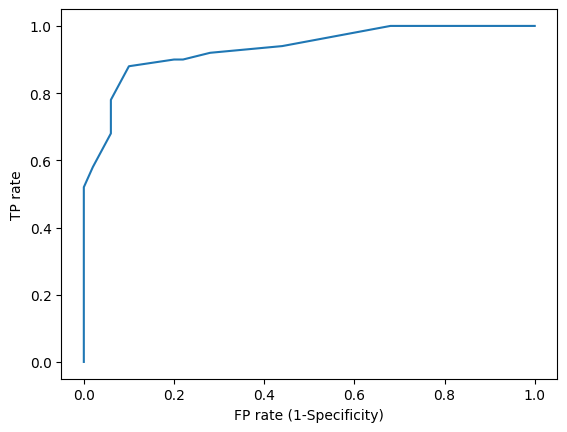

ROC 곡선 아래 부분 면적 :  0.9326


In [44]:
print("=== Confusion Matrix, 혼동행렬 ===")
conf = confusion_matrix(df['species'],y_pred)
print(conf)
print("=== 분류 분석 모형 성능평가 지표 ===")
print(classification_report(df['species'],y_pred))
print("=== F1 Score 계산 모듈 이용 ===")
print(f1_score(df['species'],y_pred),'\n')
print("=== Accuracy 계산 모듈 이용 ===")
print(precision_score(df['species'],y_pred),'\n')
print("=== Recall (재현율) 계산 모듈 이용 ===")
print(recall_score(df['species'],y_pred))

print("\n=== ROC Curve ===")
fpr, tpr, thresholds = roc_curve(df['species'], model.predict(df['sepal_length']))
plt.plot(fpr, tpr)
plt.xlabel('FP rate (1-Specificity)'); plt.ylabel('TP rate');plt.show()
print("ROC 곡선 아래 부분 면적 : ",auc(fpr, tpr)) 

### Data split, 학습, 예측

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])
df = pd.concat([x,y],axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Data split.
df_input = df[iris.feature_names].to_numpy()
df_output = df['species'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, random_state=55)

# Data Scale
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

# Model
model = LogisticRegression(C=20, max_iter=1000).fit(X_train_scale, y_train)
print("훈련집합 분류 성능(정확도) : ",model.score(X_train_scale, y_train))
print("검증집합 분류 성능(정확도) : ",model.score(X_test_scale, y_test))

print(model.classes_) 
print(model.coef_)      # 각 features의 계수
print(model.intercept_) # 각 features의 절편

# Predict
print("\n=== .decision_function, .predict, .predict_proba ===\n")
print(model.decision_function(x[:5]),"\n") # 수치로 모델이 얼만큼 확신하는지 알 수 있음.
print(model.predict(x[:5]),"\n")         # 품종 예측.
print(model.predict_proba(x[:5]),"\n")   # 품종 예측 확률.


훈련집합 분류 성능(정확도) :  0.9821428571428571
검증집합 분류 성능(정확도) :  0.9473684210526315
[0 1 2]
[[-1.60855849  2.5673491  -3.46427449 -3.29890685]
 [ 1.68929439 -0.94404732 -2.21385143 -1.51930692]
 [-0.0807359  -1.62330178  5.67812592  4.81821377]]
[ 0.46059623  4.1460987  -4.60669493]

=== .decision_function, .predict, .predict_proba ===

[[-4.26709584  6.05408108 -1.78698524]
 [-5.22905869  6.18824586 -0.95918717]
 [-4.04744973  5.88296266 -1.83551294]
 [-4.83618369  5.36566767 -0.52948398]
 [-3.84950508  5.79074691 -1.94124183]] 

[1 1 1 1 1] 

[[3.29143111e-05 9.99574004e-01 3.93081964e-04]
 [1.09946461e-05 9.99202751e-01 7.86254050e-04]
 [4.86477267e-05 9.99507034e-01 4.44318599e-04]
 [3.69983466e-05 9.97217901e-01 2.74510039e-03]
 [6.50239113e-05 9.99496626e-01 4.38350281e-04]] 



C:\Users\rlaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\rlaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\rlaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### 다중분류 클래스 ROC 곡선


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize # 자신 클래스 양성, 다른 클래스 음성.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

iris = load_iris()
x = iris.data
y = label_binarize(iris.target, classes=[0,1,2]) # OvR(Over-vs-the Rest) : setosa=[1,0,0] 이런식.

fpr, tpr, thr = [None]*3, [None]*3, [None]*3 # FPR, TPR, 임계값 초기화.

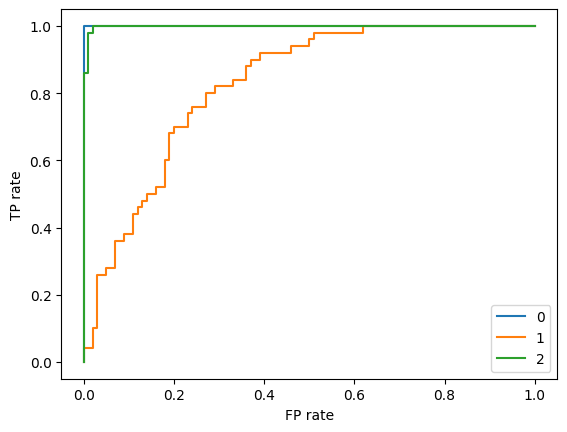

Class = 0 분류 성능에 대한 AUC = 1.0
Class = 1 분류 성능에 대한 AUC = 0.8258
Class = 2 분류 성능에 대한 AUC = 0.9984


In [52]:
for i in range(3):
    model = LogisticRegression(C=20, max_iter=1000).fit(x, y[:,i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:,i], model.predict_proba(x)[:,1])
    plt.plot(fpr[i], tpr[i], label=i)
    
plt.xlabel('FP rate'); plt.ylabel('TP rate'); plt.legend()
plt.show()

for i in range(3):
    print(f'Class = {i} 분류 성능에 대한 AUC = {auc(fpr[i], tpr[i])}')

## 4. 의사결정나무

## 5. 인공신경망

## 6. 서포트벡터머신

## 7. 베이지안 기법

## 8. 앙상블 기법

## 9. 군집 및 k-NN 분류 분석

## 10. 연관성 분석

# 4과목